In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data=pd.read_csv('car_data.csv')
print(data.shape)
data.head(10)

(1444, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,alto 800,2017,285000,360000,2135,petrol,Dealer,manual,1
1,alto 800,2016,450000,600000,50000,petrol,Dealer,manual,1
2,alto k10,2016,285000,395000,25000,petrol,Dealer,manual,1
3,alto k10,2014,225000,346000,45280,petrol,Dealer,manual,1
4,alto k10,2010,195000,395000,44542,petrol,Dealer,manual,1
5,alto k10,2016,300000,376000,10079,petrol,Dealer,manual,1
6,alto k10,2014,255000,398000,46706,petrol,Dealer,manual,1
7,alto k10,2014,500000,625000,40000,diesel,Dealer,automatic,2
8,alto k10,2016,300000,376000,10079,petrol,Dealer,manual,1
9,alto k10,2014,255000,398000,46706,petrol,Dealer,manual,1


In [3]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['petrol' 'diesel' 'cng' 'CNG']
Unique elements in Transmission are ['manual' 'automatic']
Unique elements in Owner are [1 2 0 3 5 4]
Unique elements in Year are [2017 2016 2014 2010 2015 2012 2013 2011 2006 2009 2004 2008 2019 2018
 2007 2020 2005 2003 2002]


In [5]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())

Unique elements in Car_Name are 205


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,1444.000000,1.444000e+03,1.444000e+03,1444.000000,1444.000000
mean,2013.838643,5.011286e+05,6.541328e+05,59165.324100,1.261080
std,3.072175,3.549000e+05,4.922572e+05,41931.393184,0.555058
min,2002.000000,3.500000e+04,9.689900e+04,379.000000,0.000000
25%,2012.000000,2.897740e+05,3.832990e+05,32024.750000,1.000000
50%,2014.000000,4.100495e+05,5.248705e+05,51593.000000,1.000000
75%,2016.000000,6.000000e+05,7.761922e+05,78176.000000,1.000000
max,2020.000000,3.866000e+06,9.260000e+06,640251.000000,5.000000


In [7]:
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2017,285000,360000,2135,petrol,Dealer,manual,1
1,2016,450000,600000,50000,petrol,Dealer,manual,1
2,2016,285000,395000,25000,petrol,Dealer,manual,1
3,2014,225000,346000,45280,petrol,Dealer,manual,1
4,2010,195000,395000,44542,petrol,Dealer,manual,1


In [8]:
dataset['Present_Year']=2023
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2017,285000,360000,2135,petrol,Dealer,manual,1,2023,6
1,2016,450000,600000,50000,petrol,Dealer,manual,1,2023,7
2,2016,285000,395000,25000,petrol,Dealer,manual,1,2023,7
3,2014,225000,346000,45280,petrol,Dealer,manual,1,2023,9
4,2010,195000,395000,44542,petrol,Dealer,manual,1,2023,13


In [9]:
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,285000,360000,2135,petrol,Dealer,manual,1,6
1,450000,600000,50000,petrol,Dealer,manual,1,7
2,285000,395000,25000,petrol,Dealer,manual,1,7
3,225000,346000,45280,petrol,Dealer,manual,1,9
4,195000,395000,44542,petrol,Dealer,manual,1,13


In [10]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_cng,Fuel_Type_diesel,Fuel_Type_petrol,Seller_Type_Individual,Transmission_manual
0,285000,360000,2135,1,6,0,0,1,0,1
1,450000,600000,50000,1,7,0,0,1,0,1
2,285000,395000,25000,1,7,0,0,1,0,1
3,225000,346000,45280,1,9,0,0,1,0,1
4,195000,395000,44542,1,13,0,0,1,0,1


In [11]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_cng', 'Fuel_Type_diesel',
       'Fuel_Type_petrol', 'Seller_Type_Individual', 'Transmission_manual'],
      dtype='object')

In [12]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_cng,Fuel_Type_diesel,Fuel_Type_petrol,Seller_Type_Individual,Transmission_manual
Selling_Price,1.000000,0.809435,-0.163077,-0.170776,-0.449886,-0.099039,0.383836,-0.325450,-0.029551,-0.375163
Present_Price,0.809435,1.000000,-0.083547,-0.181938,-0.231591,-0.106002,0.324262,-0.269010,-0.095969,-0.324253
Kms_Driven,-0.163077,-0.083547,1.000000,0.179714,0.420809,0.098542,0.239289,-0.270095,0.108671,0.063818
Owner,-0.170776,-0.181938,0.179714,1.000000,0.292674,0.085720,-0.062827,0.027523,0.090034,0.006669
Number_of_Years_Old,-0.449886,-0.231591,0.420809,0.292674,1.000000,0.003964,-0.110642,0.101525,0.027128,0.142703
Fuel_Type_cng,-0.099039,-0.106002,0.098542,0.085720,0.003964,1.000000,-0.134183,-0.287103,0.041410,0.057595
Fuel_Type_diesel,0.383836,0.324262,0.239289,-0.062827,-0.110642,-0.134183,1.000000,-0.904340,-0.000718,-0.075766
Fuel_Type_petrol,-0.325450,-0.269010,-0.270095,0.027523,0.101525,-0.287103,-0.904340,1.000000,-0.012936,0.046769
Seller_Type_Individual,-0.029551,-0.095969,0.108671,0.090034,0.027128,0.041410,-0.000718,-0.012936,1.000000,-0.010605
Transmission_manual,-0.375163,-0.324253,0.063818,0.006669,0.142703,0.057595,-0.075766,0.046769,-0.010605,1.000000


<Axes: >

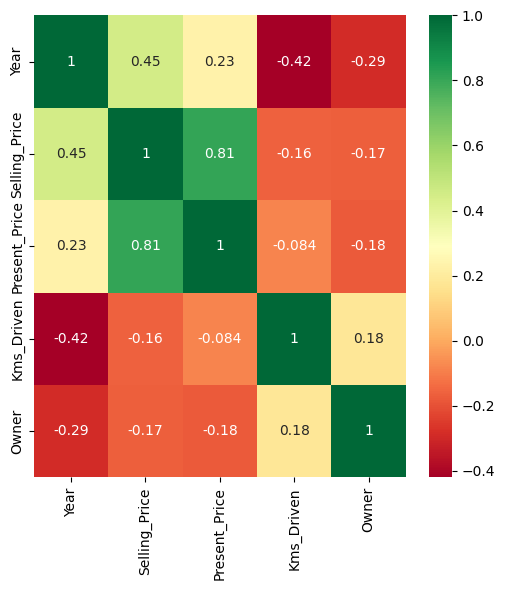

In [13]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_cng,Fuel_Type_diesel,Fuel_Type_petrol,Seller_Type_Individual,Transmission_manual,Selling_Price
0,360000,2135,1,6,0,0,1,0,1,285000
1,600000,50000,1,7,0,0,1,0,1,450000
2,395000,25000,1,7,0,0,1,0,1,285000
3,346000,45280,1,9,0,0,1,0,1,225000
4,395000,44542,1,13,0,0,1,0,1,195000


In [15]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
X_train

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_cng,Fuel_Type_diesel,Fuel_Type_petrol,Seller_Type_Individual,Transmission_manual
866,310168,89370,1,10,0,1,0,0,1
438,411090,94746,1,9,1,0,0,0,1
506,9260000,78000,1,13,0,1,0,0,1
881,310168,62555,1,12,0,0,1,0,1
472,460000,30000,1,10,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
763,511599,129364,1,10,0,1,0,0,1
835,311899,105520,1,12,0,1,0,0,1
1216,182199,149025,4,16,0,0,1,1,1
559,405107,6662,1,5,0,0,1,0,1


Decision Tree Score on Training set is 0.9999905734797839
Decision Tree Score on Test Set is 0.270549142731229
[0.87007678 0.61886231 0.50038257 0.53192076 0.42638895]
Accuracy: 58.95 %
Standard Deviation: 15.33 %
Mean Absolute Error: 109206.15207373272
Mean Squared Error: 73687448829.31337
RMSE: 271454.3218099748
The r2_score is 0.270549142731229


<ipython-input-19-7ea78d1ad700>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


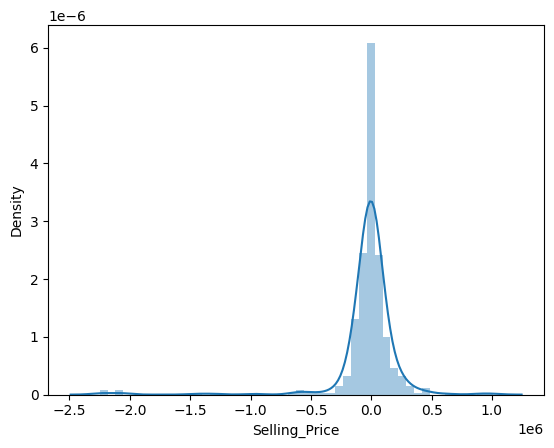

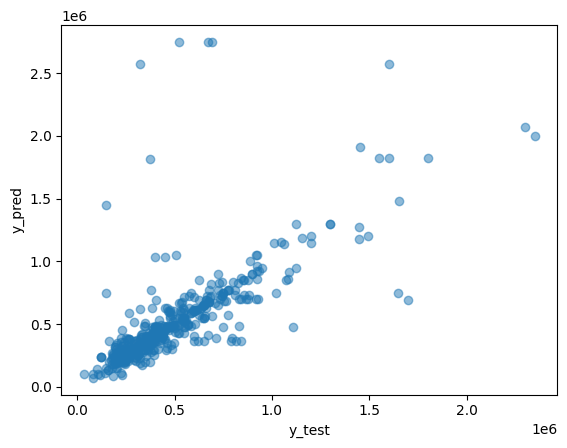

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Score on Training set is 0.8571969235079845
Random Forest Score on Test Set is 0.6894174812798342


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

[0.88692397 0.73220822 0.52087897 0.78148869 0.88578393]
Accuracy: 76.15 %
Standard Deviation: 13.44 %
Mean Absolute Error: 80962.00752636149
Mean Squared Error: 31374332112.18911
RMSE: 177128.01052399678
The r2_score is 0.6894174812798342


<ipython-input-20-a9bf2c60ad3d>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


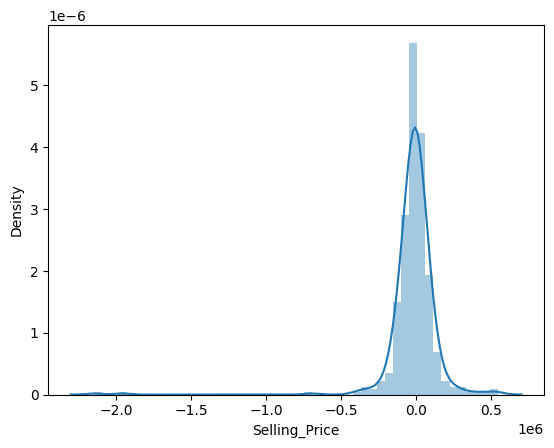

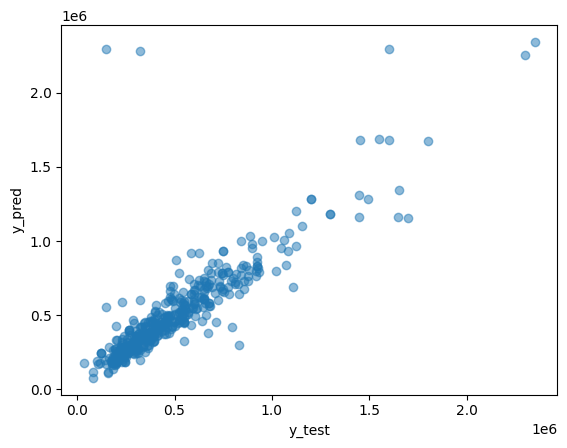

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Gradient Boosting Score on Training set is 0.9440544148215597
Gradient Boosting Score on Test Set is 0.724689963982954
[0.84703804 0.70903992 0.64962402 0.82818089 0.9038955 ]
Accuracy: 78.76 %
Standard Deviation: 9.37 %
Mean Absolute Error: 88169.24759393178
Mean Squared Error: 27811186989.56804
RMSE: 166766.86418341036
The r2_score is 0.724689963982954


<ipython-input-21-08a20c2080fc>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


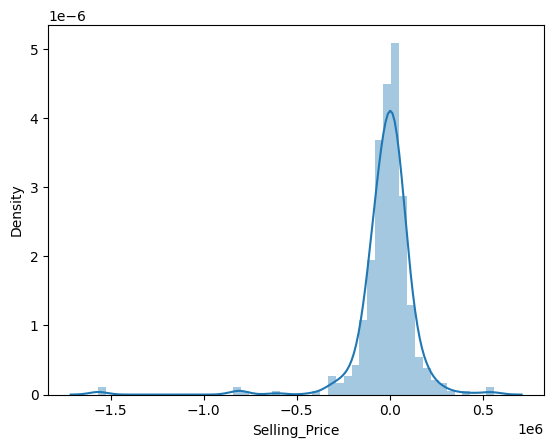

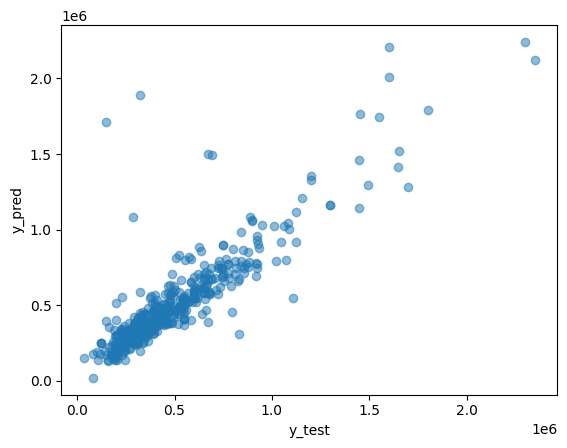

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)

print("Gradient Boosting Score on Training set is",gbr.score(X_train, y_train))#Training Accuracy
print("Gradient Boosting Score on Test Set is",gbr.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(gbr, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Voting Regresssor Score on Training set is 0.9170930087241453
Voting Regresssor Score on Test Set is 0.7250062209120853


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

[0.88436166 0.73316868 0.59872859 0.81726497 0.90266126]
Accuracy: 78.72 %
Standard Deviation: 11.15 %
Mean Absolute Error: 83066.60403260318
Mean Squared Error: 27779239441.559746
RMSE: 166671.05160032964
The r2_score is 0.7250062209120853


<ipython-input-22-ea3d48bfebc4>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


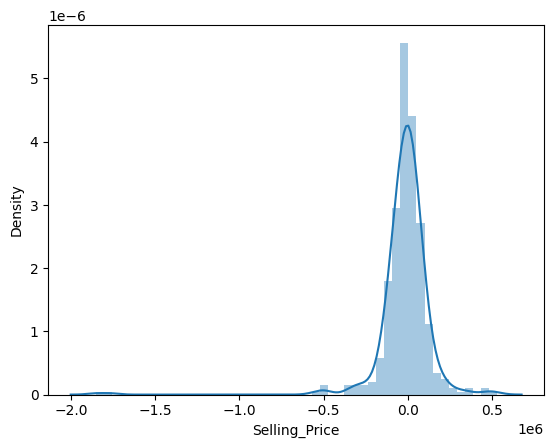

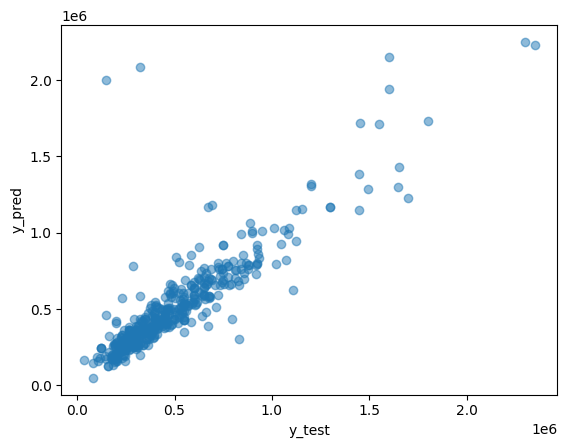

In [22]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('GradientBoostingRegressor', gbr), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [26]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("vot_reg.pkl", "rb"))

#model.predict([[Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type,Transmission]])

new_val = model.predict([[655000,165000,1,7,0,1,0,0,1]])


print("The resale value will be around {} lakhs.".format(np.round(new_val,2)))

The resale value will be around [607126.92] lakhs.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
